---
title: Map Rasters!
subtitle: DSE EcoTech Series (2024)
author:
    name: Brookie Guzder-Williams
    affiliations: 
        - The Eric and Wendy Schmidt Center for Data Science & Environment
        - University of California Berkeley
    orcid: 0000-0001-6855-8260
    email: bguzder-williams@berkeley.edu
date: 2024-10-23
---

license: CC-BY-4.0


---


Remeber our pretty visualization?

```{image} ../../assets/raster_vis.png
:width: 80%
:align: center
```
That's not a map!


---

### IMPORTS

In [34]:
from typing import Any, Union
import sys
from IPython.display import Image
from  pathlib import Path
import matplotlib.pyplot as plt
from localtileserver import get_leaflet_tile_layer, TileClient
import ipyleaflet
import localtileserver
import leafmap


---

### CONSTANTS

In [39]:
GEOTIFF_FOLDER = '../data/raster'
COG_FOLDER = '../data/raster/cogs'
MAP_CENTER = (39.1780195, -120.17694813)

In [24]:
GEOTIFF_PATHS = [p for p in Path(GEOTIFF_FOLDER).glob(f'*.tif')]
COG_PATHS = [p for p in Path(COG_FOLDER).glob(f'*.tif')]
PATHS = COG_PATHS

In [26]:
for p in PATHS:
    print(p.name)

tahoe-dem.tif
tahoe-mean-s2-20210101_20210301.tif



---

## IPYLEAFLET

Try replacing the `PATHS = COG_PATHS` with the `PATHS = GEOTIFF_PATHS` ... It slows to a halt

In [28]:
client = TileClient(PATHS[0])
dem_layer = get_leaflet_tile_layer(client)
ipyleaflet_map = ipyleaflet.Map(center=client.center(), zoom=client.default_zoom)
ipyleaflet_map.add(dem_layer)
ipyleaflet_map

Map(center=[39.147592, -120.2907945], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…


---

## LEAFMAP

In [30]:
basemaps = list(leafmap.basemaps.keys())
print(len(basemaps))
basemaps[:10]

155


['OpenStreetMap',
 'Google Maps',
 'Google Satellite',
 'Google Terrain',
 'Google Hybrid',
 'FWS NWI Wetlands',
 'FWS NWI Wetlands Raster',
 'NLCD 2021 CONUS Land Cover',
 'NLCD 2019 CONUS Land Cover',
 'NLCD 2016 CONUS Land Cover']

In [51]:
leafmap_map = leafmap.Map(basemap='NASAGIBS.BlueMarble')
leafmap_map.add_raster(str(PATHS[0]), bands=[1], layer_name='dem', vmin=1000, vmax=3000, cmap='hot')
leafmap_map.add_raster(str(PATHS[1]), layer_name='s2', bands=[4,3,2], vmin=0, vmax=5000)
leafmap_map

Map(center=[39.147592, -120.2907945], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…


---

## MAKE YOUR OWN TILE SERVER

using rio-tiler you can generate maptiles from cogs.  maptiler/app.py is an example taken from rio-tiler's docs.  i'm using it here

(256, 256, 4) 1.0 0.0


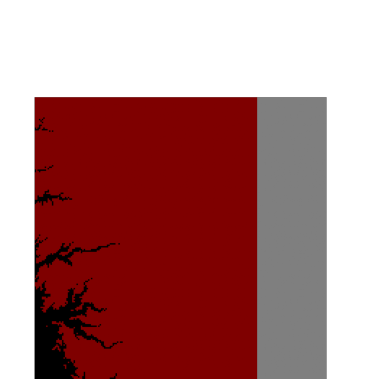

In [41]:
url = 'http://127.0.0.1:8000/8/42/97.png'
from io import BytesIO
from urllib.request import urlopen
im_bytes = BytesIO(urlopen(url).read())
arr = plt.imread(im_bytes)
print(arr.shape, arr.max(), arr.min())
plt.axis('off')
_ = plt.imshow(arr)

In [45]:
leafmap_map_2 = leafmap.Map(zoom=8, height=600, width=1200)
leafmap_map_2.center = MAP_CENTER
leafmap_map_2.add_tile_layer(
    url="http://127.0.0.1:8000/{z}/{x}/{y}.png",
    bands=[4,3,2],
    name="Tile Server",
    attribution="Rio Tiler",
)
leafmap_map_2.add_layer_control(position="topleft")
leafmap_map_2

Map(center=[39.1780195, -120.17694813], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_ti…